<a href="https://colab.research.google.com/github/Vaishnavi-cyber-blip/nlp-sentiment-analysis/blob/main/TMLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
import re # Regular expression for working with text based data
import numpy as np # 
import pandas as pd # For reading the dataset
from sklearn.model_selection import train_test_split # For train test splitting purpose
import matplotlib.pyplot as plt # making the graphical() representation

from keras.models import Sequential, load_model  # For  sequential model : https://keras.io/guides/sequential_model/
                                                 # For loading the saved model >
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer    
from keras.preprocessing.sequence import pad_sequences

In [164]:
# Loading a dataset
# Upload a zip file
# Extract files from a zip file
from zipfile import ZipFile
with ZipFile('Twitter_Data.csv.zip', 'r') as zipObj:
  #Extract all the elements of file in current directory'
  zipObj.extractall()

In [165]:
# Reading train file

import pandas as pd
df = pd.read_csv("/content/Twitter_Data.csv")
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [166]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [167]:
df[df['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [168]:
df[df['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [169]:
df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

In [170]:
df = df[['clean_text', 'category']]    # Removing all the columns except for sentiments and text column
df.head()
df.shape


(162969, 2)

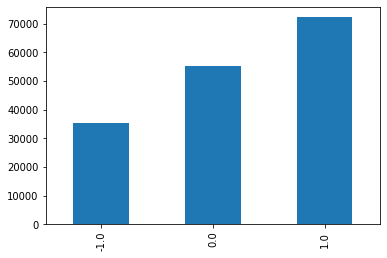

In [171]:
df['category'].value_counts().sort_index().plot.bar()   # Sort object by labels (along an axis).

In [172]:
df['clean_text'] = df['clean_text'].str.lower()   # text to lowercase
df['clean_text'].tail()

162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, dtype: object

In [173]:
data_pos = df[df['category'] == 1]
data_neg = df[df['category'] == 0]
data_neu = df[df['category'] == -1]

In [174]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [175]:
# Removing all the stopwords from the text

STOPWORDS = set(stopwordlist)    # The list before conversion is : [3, 4, 1, 4, 5]
                                 # The list after conversion is using set : {1, 3, 4, 5}
def cleaning_stopwords(text):     #removing all the stop words
  return" ".join([word for word in str(text).split() if word not in STOPWORDS])    # logic behind cleaning
df['clean_text'] = df['clean_text'].apply(lambda text: cleaning_stopwords(text))      #calling the function
df['clean_text'].head()           # Showcasing

0    modi promised “minimum government maximum gove...
1               talk nonsense continue drama vote modi
2    say vote modi welcome bjp told rahul main camp...
3    asking supporters prefix chowkidar names modi ...
4    answer among powerful world leader today trump...
Name: clean_text, dtype: object

In [176]:
import string  # Removing all the punctuation marks
english_punctuations = string.punctuation
punctuations_list = english_punctuations  # output : !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
def cleaning_punctuations(text):
  translator = str.maketrans('','', punctuations_list)
  return text.translate(translator)
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_punctuations(x))
df['clean_text'].tail()

162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing 10...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [177]:
def cleaning_repeating_char(text): 
  return re.sub(r'(.)1+', r'1', text)
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_repeating_char(x))
df['clean_text'].tail()  # cleaning the repeting characters


162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing100...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [178]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)    # cleaning urls
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_URLs(x))
df['clean_text'].tail()

162975    456 crores paid neerav modi not recovered cong...
162976    dear rss terrorist payal gawar modi killing100...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [179]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['clean_text'] = df['clean_text'].apply(lambda x: cleaning_numbers(x))
df['clean_text'].tail()

162975     crores paid neerav modi not recovered congres...
162976    dear rss terrorist payal gawar modi killing pl...
162977                         cover interaction forum left
162978    big project came india modi dream project but ...
162979    ever listen like gurukul discipline maintained...
Name: clean_text, dtype: object

In [180]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['clean_text'] = df['clean_text'].apply(tokenizer.tokenize)   # converting a sentence into the tokens
df['clean_text'].head()

0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: clean_text, dtype: object

In [181]:
import nltk
st = nltk.PorterStemmer()    # Stemming of data
                             # Removes unnecesary suffix or prefix from the word (converts to the root word) : i.e-- crashed, crashing, crashes --to-- crash
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['clean_text']= df['clean_text'].apply(lambda x: stemming_on_text(x))
df['clean_text'].head()


0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: clean_text, dtype: object

In [182]:
# Applying lemmatizer : This is a better technique then stemming ... since it always returns a meaningfull word and in stemming it analysis the word and removes suffix and prefix without knowing if the output word makes sense or not

In [183]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['clean_text'] = df['clean_text'].apply(lambda x: lemmatizer_on_text(x))
df['clean_text'].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [modi, promised, minimum, government, maximum,...
1        [talk, nonsense, continue, drama, vote, modi]
2    [say, vote, modi, welcome, bjp, told, rahul, m...
3    [asking, supporters, prefix, chowkidar, names,...
4    [answer, among, powerful, world, leader, today...
Name: clean_text, dtype: object

In [184]:
lower_sentences = [' '.join(words) for words in df.clean_text]
print(lower_sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [185]:
X=lower_sentences
y=df.category

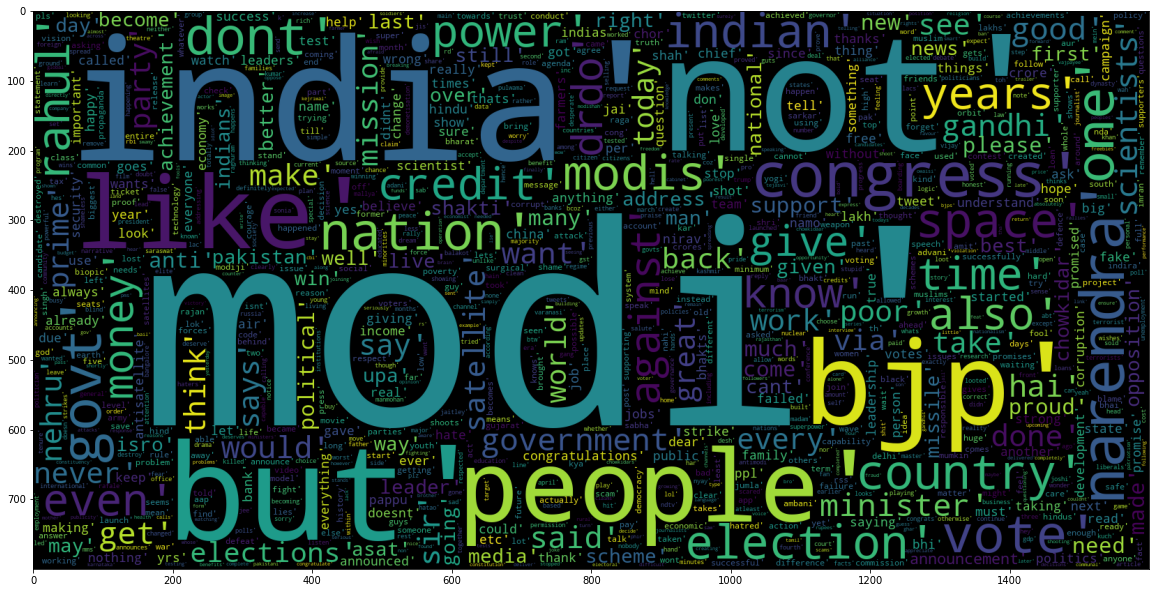

In [186]:
# Plotting of word cloud : 
# -- plotting a word cloud gives us the analysis of text: the important and most frequently occuring words are pictured larger in size rather then the once which are of less importance.

from wordcloud import WordCloud
data_neg = df['clean_text'][:80000] 
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join((str(v) for v in data_neg)))
plt.imshow(wc)

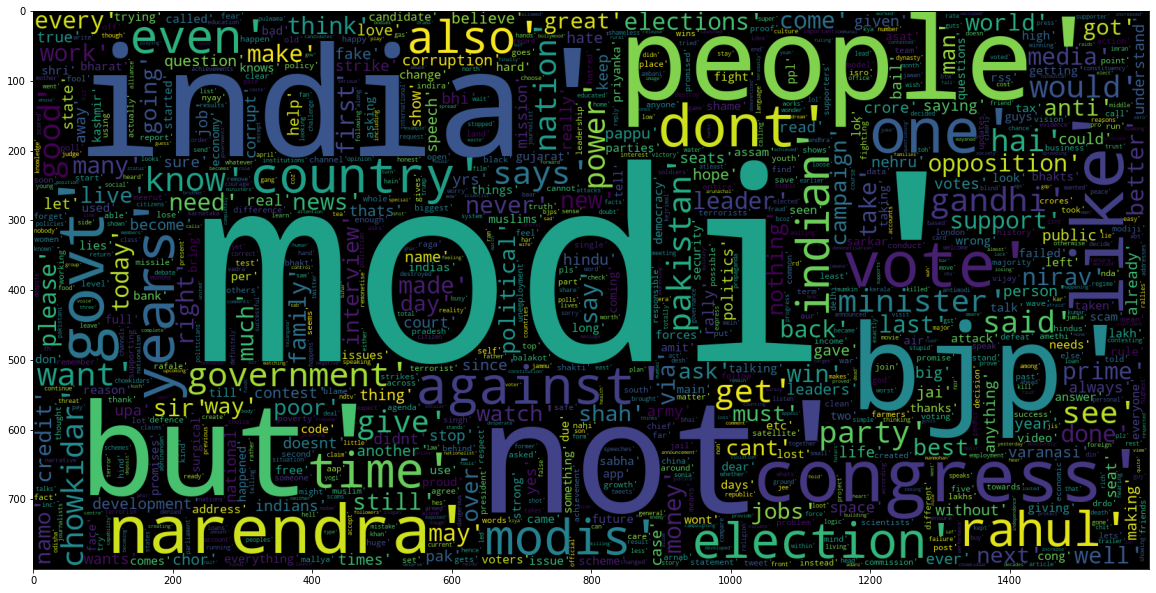

In [187]:
data_pos = df['clean_text'][80000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join((str(v) for v in data_pos)))  
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)  # Train test splitting


In [189]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000)  # numerical statistic that tells how important the word is in the document
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  5000


In [190]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [191]:
import seaborn as sns
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive','Neutral']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos', 'False Neu', 'True Neu' ]
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(3,2)
  sns.heatmap(cf_matrix, annot = True, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

        -1.0       0.89      0.81      0.85      1801
         0.0       0.86      0.97      0.91      2669
         1.0       0.93      0.89      0.91      3679

    accuracy                           0.90      8149
   macro avg       0.89      0.89      0.89      8149
weighted avg       0.90      0.90      0.90      8149



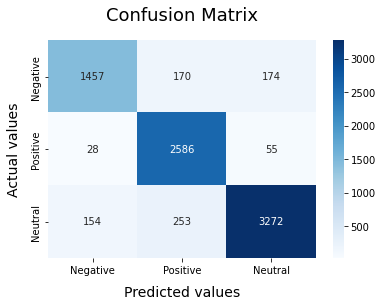

In [192]:
from sklearn.linear_model import LogisticRegression      # Here we are using logistic regression technique
from sklearn.metrics import confusion_matrix, classification_report
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)